In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from imblearn.over_sampling import SMOTE


import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("/content/sample_data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data=df.copy()
data.drop('customerID',axis=1,inplace=True)
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')
data=data[data.TotalCharges.notnull()].reset_index(drop=True)
data.shape


(7032, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


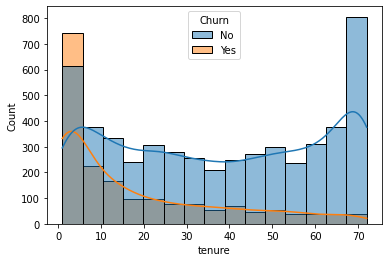

In [6]:
sns.histplot(data=data,
             x='tenure',
             hue='Churn',
             kde=True);

In [7]:
data=data.replace(['No phone service','No internet service'],'No')
data=data.replace({'Female':1,'Male':0})
for col in data:
  if data[col].dtypes=='object':
    if col!='InternetService':
      data[col]=data[col].replace({'Yes':1,'No':0})
    print(col," : ",data[col].unique())


Partner  :  [1 0]
Dependents  :  [0 1]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProtection  :  [0 1]
TechSupport  :  [0 1]
StreamingTV  :  [0 1]
StreamingMovies  :  [0 1]
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]


In [8]:
for i in ['InternetService','Contract','PaymentMethod']:
  data[i]=pd.get_dummies(data[i],drop_first=True)

In [9]:
for col in data:
  print(col," : ",data[col].unique())

gender  :  [1 0]
SeniorCitizen  :  [0 1]
Partner  :  [1 0]
Dependents  :  [0 1]
tenure  :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService  :  [0 1]
MultipleLines  :  [0 1]
InternetService  :  [0 1]
OnlineSecurity  :  [0 1]
OnlineBackup  :  [1 0]
DeviceProtection  :  [0 1]
TechSupport  :  [0 1]
StreamingTV  :  [0 1]
StreamingMovies  :  [0 1]
Contract  :  [0 1]
PaperlessBilling  :  [1 0]
PaymentMethod  :  [0 1]
MonthlyCharges  :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges  :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn  :  [0 1]


In [10]:
scaler=MinMaxScaler()
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
data[cols_to_scale]=scaler.fit_transform(data[cols_to_scale])

In [11]:
X = data.drop('Churn',axis=1)
y = data['Churn'].copy()
X.shape,y.shape

((7032, 19), (7032,))

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5625, 19), (5625,), (1407, 19), (1407,))

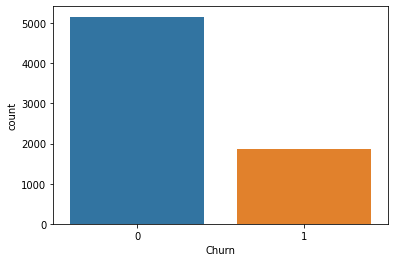

In [13]:
sns.countplot(x=y)

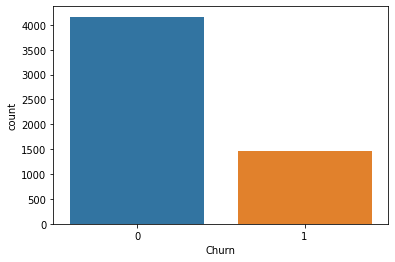

In [14]:
sns.countplot(x=y_train)

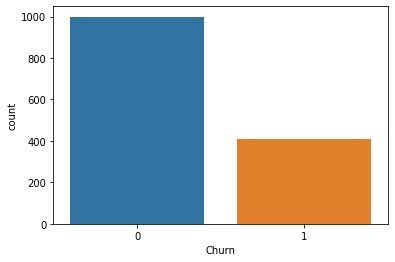

In [15]:
sns.countplot(x=y_test)

In [16]:
X_train.shape

(5625, 19)

There is imbalance in Churn column

In [17]:
model = keras.Sequential([
                          keras.layers.Dense(units = 20,
                                             input_shape=(X_train.shape[1],),
                                             activation='relu'),
                          keras.layers.Dense(units = 15,
                                             activation='relu'),
                          keras.layers.Dense(1,
                                             activation='sigmoid')
])



In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train,
          y_train,
          validation_split=0.2,
          batch_size=8,
          epochs=100)

Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 0.5367 - accuracy: 0.7433 - val_loss: 0.4944 - val_accuracy: 0.7493
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4592 - accuracy: 0.7909 - val_loss: 0.4691 - val_accuracy: 0.7698
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.8042 - val_loss: 0.4591 - val_accuracy: 0.7849
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4327 - accuracy: 0.8080 - val_loss: 0.4541 - val_accuracy: 0.7804
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4281 - accuracy: 0.8107 - val_loss: 0.4512 - val_accuracy: 0.7733
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4248 - accuracy: 0.8084 - val_loss: 0.4476 - val_accuracy: 0.7778
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.4233 - accuracy: 0.8102 - val_loss: 0.4458 - val_accuracy: 0.7858

In [20]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.7761


[0.4562525749206543, 0.7761194109916687]

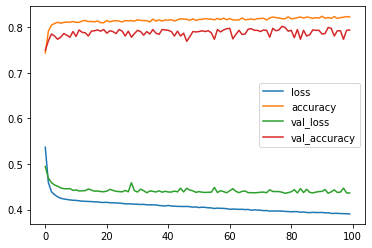

In [21]:
pd.DataFrame(history.history).plot()

In [22]:
pred = model.predict(X_test)
pred_class = np.round(pred,0)
pred_class=list(pred_class.reshape(-1))

In [23]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       999
           1       0.63      0.54      0.58       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.71      1407
weighted avg       0.77      0.78      0.77      1407



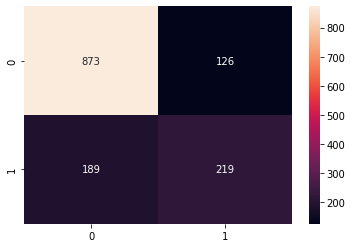

In [24]:
sns.heatmap(confusion_matrix(y_test,pred_class),annot=True,fmt='d')

FIXING IMBALANCE IN DATASET

In [25]:
# 1. undersampling majority class (class_0)
X = data.drop('Churn',axis=1)
y = data['Churn'].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
train_data = X_train.join(y_train)

class_0,class_1 = train_data.Churn.value_counts()

undersampled_class_0 = train_data[train_data.Churn==0].sample(class_1)
data_undersampled = pd.concat([undersampled_class_0,train_data[train_data.Churn==1]],ignore_index=True)
data_undersampled = data_undersampled.iloc[np.random.permutation(len(data_undersampled))].reset_index(drop=True)

X_train_new = data_undersampled.drop('Churn',axis=1)
y_train_new = data_undersampled['Churn'].copy()

In [26]:
data_undersampled.Churn.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [27]:
history = model.fit(X_train_new,
          y_train_new,
          validation_split=0.2,
          batch_size=8,
          epochs=100)

Epoch 1/100
299/299 [==============================] - 1s 2ms/step - loss: 0.4808 - accuracy: 0.7692 - val_loss: 0.5336 - val_accuracy: 0.7291
Epoch 2/100
299/299 [==============================] - 1s 2ms/step - loss: 0.4774 - accuracy: 0.7717 - val_loss: 0.5288 - val_accuracy: 0.7258
Epoch 3/100
299/299 [==============================] - 1s 2ms/step - loss: 0.4756 - accuracy: 0.7709 - val_loss: 0.5297 - val_accuracy: 0.7224
Epoch 4/100
299/299 [==============================] - 1s 2ms/step - loss: 0.4733 - accuracy: 0.7776 - val_loss: 0.5254 - val_accuracy: 0.7224
Epoch 5/100
299/299 [==============================] - 1s 3ms/step - loss: 0.4723 - accuracy: 0.7747 - val_loss: 0.5217 - val_accuracy: 0.7191
Epoch 6/100
299/299 [==============================] - 1s 2ms/step - loss: 0.4704 - accuracy: 0.7738 - val_loss: 0.5307 - val_accuracy: 0.7308
Epoch 7/100
299/299 [==============================] - 1s 2ms/step - loss: 0.4687 - accuracy: 0.7751 - val_loss: 0.5267 - val_accuracy: 0.7224

In [28]:
pred = model.predict(X_test)
pred_class = np.round(pred,0)
pred_class=list(pred_class.reshape(-1))
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.74      0.75      1407



Improved precision & recall for minority class (Churn = 1)

In [29]:
# 2. oversampling minority class (Churn = 1) with duplication

X = data.drop('Churn',axis=1)
y = data['Churn'].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)
train_data = X_train.join(y_train)


class_0_size = train_data[train_data.Churn==0].shape[0]
oversampled_class_1 = train_data[train_data.Churn==1].sample(class_0_size,
                                                 replace=True)
print("Oversampled class 1 : ",oversampled_class_1.shape,"\n",
      "Actual class 0 : ", train_data[train_data.Churn==0].shape)

data_oversampled = pd.concat([oversampled_class_1,train_data[train_data.Churn==0]],ignore_index=True)
data_oversampled = data_oversampled.iloc[np.random.permutation(len(data_oversampled))].reset_index(drop=True)

X_train_new = data_oversampled.drop('Churn',axis=1)
y_train_new = data_oversampled['Churn'].copy()

print(data_oversampled.Churn.value_counts())

Oversampled class 1 :  (4130, 20) 
 Actual class 0 :  (4130, 20)
1    4130
0    4130
Name: Churn, dtype: int64


In [30]:
history = model.fit(X_train_new,
          y_train_new,
          validation_split=0.2,
          batch_size=8,
          epochs=100)

Epoch 1/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4814 - accuracy: 0.7688 - val_loss: 0.4463 - val_accuracy: 0.7930
Epoch 2/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4727 - accuracy: 0.7688 - val_loss: 0.4582 - val_accuracy: 0.7930
Epoch 3/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4687 - accuracy: 0.7762 - val_loss: 0.4441 - val_accuracy: 0.7918
Epoch 4/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4654 - accuracy: 0.7760 - val_loss: 0.4438 - val_accuracy: 0.7851
Epoch 5/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4639 - accuracy: 0.7785 - val_loss: 0.4444 - val_accuracy: 0.7869
Epoch 6/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4614 - accuracy: 0.7794 - val_loss: 0.4479 - val_accuracy: 0.7930
Epoch 7/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4604 - accuracy: 0.7809 - val_loss: 0.4461 - val_accuracy: 0.7833

In [31]:
pred = model.predict(X_test)
pred_class = np.round(pred,0)
pred_class=list(pred_class.reshape(-1))
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1033
           1       0.57      0.63      0.60       374

    accuracy                           0.78      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [32]:
 # 3. Oversampling minority class (Churn = 1) using SMOTE

# Original X,y
X = data.drop('Churn',axis=1)
y = data['Churn'].copy()
print("Original : ",X.shape,y.shape)
print(y.value_counts())

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)


smote = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print("Oversampled : ",X_train_smote.shape,y_train_smote.shape)
print(pd.DataFrame(y_train_smote).value_counts())

Original :  (7032, 19) (7032,)
0    5163
1    1869
Name: Churn, dtype: int64
Oversampled :  (8260, 19) (8260,)
Churn
1        4130
0        4130
dtype: int64


In [33]:
history = model.fit(X_train_smote,
          y_train_smote,
          validation_split=0.2,
          batch_size=8,
          epochs=100)

Epoch 1/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4294 - accuracy: 0.7978 - val_loss: 0.4307 - val_accuracy: 0.8275
Epoch 2/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4238 - accuracy: 0.7993 - val_loss: 0.4902 - val_accuracy: 0.7821
Epoch 3/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4211 - accuracy: 0.7993 - val_loss: 0.5490 - val_accuracy: 0.7548
Epoch 4/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4176 - accuracy: 0.8001 - val_loss: 0.5661 - val_accuracy: 0.7663
Epoch 5/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4172 - accuracy: 0.8002 - val_loss: 0.6046 - val_accuracy: 0.7179
Epoch 6/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4146 - accuracy: 0.8037 - val_loss: 0.4581 - val_accuracy: 0.8220
Epoch 7/100
826/826 [==============================] - 2s 2ms/step - loss: 0.4141 - accuracy: 0.8021 - val_loss: 0.5815 - val_accuracy: 0.7379

In [34]:
pred = model.predict(X_test)
pred_class = np.round(pred,0)
pred_class=list(pred_class.reshape(-1))
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.59      0.58       374

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.78      0.78      1407

